In [109]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
pd.set_option('max_columns', 150)

In [46]:
ds = pd.read_csv("C:/Users/tvpia/Desktop/test/HSNS+DD/HSNS+DD/data.csv",sep="\t")

In [47]:
ds.head(5)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT
1,4,2,2,4,3,4,4,5,4,3,4,4,2,4,3,2,2,3,4,4,4,3,34,3,95,PL
2,5,5,5,4,2,5,5,4,4,2,2,2,2,4,4,2,4,3,3,4,4,2,22,2,80,AU
3,4,1,2,2,4,5,2,2,5,2,4,2,4,0,5,5,4,1,4,2,3,4,24,1,99,US
4,5,3,4,5,5,5,4,5,4,3,4,3,4,4,4,2,5,2,4,4,1,5,21,2,90,US


In [48]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53981 entries, 0 to 53980
Data columns (total 26 columns):
HSNS1       53981 non-null int64
HSNS2       53981 non-null int64
HSNS3       53981 non-null int64
HSNS4       53981 non-null int64
HSNS5       53981 non-null int64
HSNS6       53981 non-null int64
HSNS7       53981 non-null int64
HSNS8       53981 non-null int64
HSNS9       53981 non-null int64
HSNS10      53981 non-null int64
DDP1        53981 non-null int64
DDP2        53981 non-null int64
DDP3        53981 non-null int64
DDP4        53981 non-null int64
DDN1        53981 non-null int64
DDN2        53981 non-null int64
DDN3        53981 non-null int64
DDN4        53981 non-null int64
DDM1        53981 non-null int64
DDM2        53981 non-null int64
DDM3        53981 non-null int64
DDM4        53981 non-null int64
age         53981 non-null int64
gender      53981 non-null int64
accuracy    53981 non-null int64
country     53977 non-null object
dtypes: int64(25), object(1)
mem

In [49]:
ds.shape

(53981, 26)

In [50]:
ds.isnull().sum()
#there are no missing values
#lets'check for zeros in the survey reponses since it is not a recognized answer

HSNS1       0
HSNS2       0
HSNS3       0
HSNS4       0
HSNS5       0
HSNS6       0
HSNS7       0
HSNS8       0
HSNS9       0
HSNS10      0
DDP1        0
DDP2        0
DDP3        0
DDP4        0
DDN1        0
DDN2        0
DDN3        0
DDN4        0
DDM1        0
DDM2        0
DDM3        0
DDM4        0
age         0
gender      0
accuracy    0
country     4
dtype: int64

In [51]:
#let's remove all rows with a zero (missed answer)
ds_clean = ds.loc[~(ds == 0).any(axis=1)]

In [52]:
ds_clean.shape
#Since the rows with a 0 account for almost 10% of the data and the zero is oftentimes only a forgotten answer for one question,
#I think it is wiser to keep the data and replace the zero with the mean of the column

(49500, 26)

In [53]:
#lets use a mask to do that
ds=ds.mask(ds==0).fillna(ds.mean())

In [57]:
#I've seen that few rows are missing the countrys, let's drop them since there are only 4 and the country is important in our analysis
ds.dropna(inplace=True)

In [65]:
ds.country.unique()
#some country labeled A1, A2 should be dropped since they correspond to A1,"Anonymous Proxy" A2,"Satellite Provider"
# Get names of indexes for which column country has values A1 or A2
wrongcountry = ds[ (ds['country'] == "A1") | (ds['country']=="A2") ].index
 
# Delete these row indexes from dataFrame
ds.drop(wrongcountry , inplace=True)

Now lets proceed to removing the rows where accuracy (how accurately the people think that they replied in the survey) is over 100 since these answers don't seem to have been done seriously

In [70]:
notacc = ds.loc[ds.accuracy > 100].index
ds.drop(notacc, inplace=True)

Now that the basic cleaning is performed, let's create a column with the result of the the HSNScale (first test) for all entries

In [118]:
ds["HSNScale"]= round(ds.iloc[:,0:9].sum(axis=1)*2/100,2)

Let's check for high correlations in the columns

In [120]:
ds.corr().unstack().sort_values(ascending = False).drop_duplicates()

HSNScale  HSNScale    1.000000
DDM1      DDM4        0.702715
HSNS8     HSNScale    0.636315
HSNS1     HSNScale    0.619551
DDN2      DDN1        0.612533
                        ...   
gender    DDP1       -0.175636
DDN3      gender     -0.187466
DDP3      gender     -0.187835
DDM4      gender     -0.189941
DDP1      HSNS2      -0.206774
Length: 326, dtype: float64

No correlations over 0.7, which is good for us. Let's visualize this with a correlation matrix

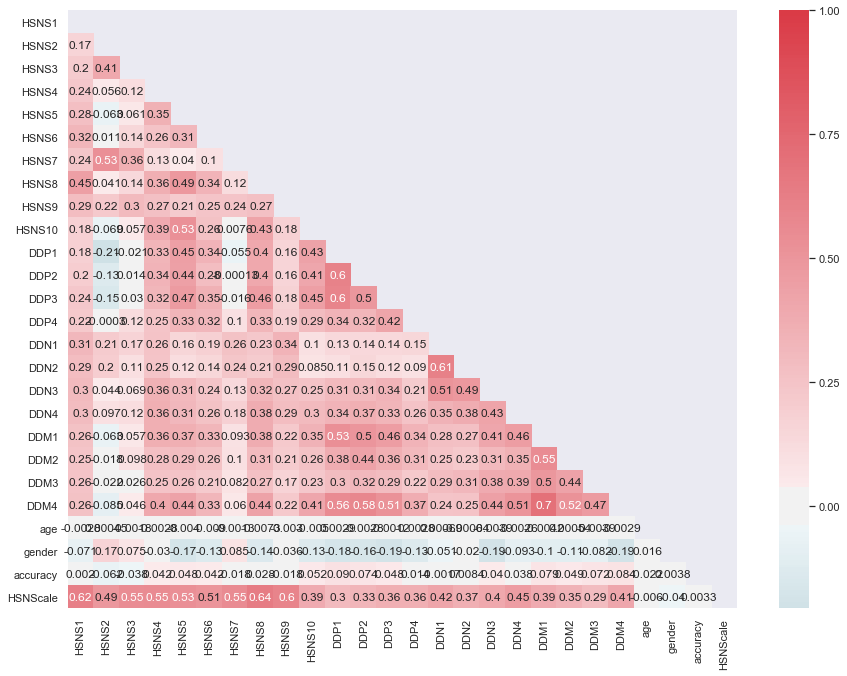

In [122]:
sns.set(color_codes = False)

corr = ds.corr()

f, ax = plt.subplots(figsize=(15, 11))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
mask = np.triu(np.ones_like(corr, dtype = np.bool))
sns.heatmap(corr, cmap = cmap,mask=mask, center = 0, annot = True)

plt.show()

#add a size parameter to the plot correlation matrix heatmap when I have time

In [124]:
from collections import Counter
print(Counter(ds.country))

Counter({'US': 28085, 'GB': 6247, 'CA': 3810, 'AU': 3019, 'DE': 831, 'IN': 659, 'SE': 630, 'PH': 565, 'PL': 522, 'BR': 517, 'NL': 495, 'NZ': 444, 'IE': 410, 'SG': 385, 'FI': 383, 'FR': 353, 'RO': 324, 'MX': 318, 'NO': 317, 'ZA': 284, 'HR': 282, 'DK': 239, 'ID': 226, 'IT': 214, 'BE': 206, 'ES': 190, 'GR': 169, 'RS': 169, 'PT': 159, 'MY': 159, 'HU': 131, 'AT': 118, 'BG': 115, 'RU': 113, 'CH': 111, 'TR': 109, 'CZ': 105, 'HK': 103, 'AR': 101, 'SI': 99, 'JP': 89, 'CN': 88, 'EE': 87, 'IL': 86, 'LT': 83, 'TH': 81, 'PK': 75, 'KR': 69, 'CL': 66, 'CO': 66, 'AE': 63, 'SK': 55, 'IS': 53, 'BA': 50, 'TT': 50, 'LV': 50, 'PR': 46, 'EU': 45, 'VN': 44, 'EG': 39, 'PE': 38, 'SA': 37, 'BS': 35, 'UA': 33, 'LB': 32, 'NG': 32, 'TW': 31, 'VE': 29, 'JM': 28, 'MT': 26, 'CR': 26, 'KE': 24, 'MK': 22, 'BD': 21, 'CY': 20, 'KW': 17, 'MA': 17, 'PA': 17, 'EC': 16, 'QA': 16, 'LU': 16, 'LK': 15, 'DO': 15, 'IR': 14, 'AP': 12, 'BN': 11, 'GE': 11, 'MU': 11, 'JO': 10, 'NP': 10, 'MV': 9, 'ME': 9, 'GU': 9, 'OM': 8, 'UY': 8, 'S

Now let's define some group of countries as target for future supervised machine learning purposes

As we can see, people from the US represent a little more than half of the total population. This makes our first classification easy (US or non US). Let's create a new column with that
US = 0
Non-US = 1

In [125]:
ds_binary = ds.copy()

In [133]:
ds.gender.value_counts() 

1.000000    33025
2.000000    19782
1.374076      596
3.000000      490
Name: gender, dtype: int64

In [126]:
ds_binary["US/OTHER"]=np.where(ds.country=="US",0,1)

In [130]:
ds_binary["US/OTHER"].value_counts(normalize=True)

0    0.521125
1    0.478875
Name: US/OTHER, dtype: float64

In [131]:
ds_binary.drop(columns="country",axis=1,inplace=True)

In [132]:
ds_binary
#save this later 

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,HSNScale,US/OTHER
0,2.0,4.0,5.0,1.0,4.0,5.0,4.0,3.0,3.0,2.0,1.0,1.0,4.0,4.000000,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,37.0,2.0,98,0.62,1
1,4.0,2.0,2.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0,2.0,4.000000,3.0,2.0,2.0,3.0,4.0,4.0,4.0,3.0,34.0,3.0,95,0.64,1
2,5.0,5.0,5.0,4.0,2.0,5.0,5.0,4.0,4.0,2.0,2.0,2.0,2.0,4.000000,4.0,2.0,4.0,3.0,3.0,4.0,4.0,2.0,22.0,2.0,80,0.78,1
3,4.0,1.0,2.0,2.0,4.0,5.0,2.0,2.0,5.0,2.0,4.0,2.0,4.0,3.789537,5.0,5.0,4.0,1.0,4.0,2.0,3.0,4.0,24.0,1.0,99,0.54,0
4,5.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,3.0,4.0,3.0,4.0,4.000000,4.0,2.0,5.0,2.0,4.0,4.0,1.0,5.0,21.0,2.0,90,0.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53976,2.0,2.0,2.0,4.0,3.0,5.0,3.0,2.0,5.0,5.0,5.0,3.0,5.0,5.000000,4.0,2.0,5.0,4.0,4.0,5.0,4.0,5.0,18.0,2.0,98,0.56,0
53977,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,2.0,1.0,2.0,2.0,4.000000,5.0,4.0,5.0,4.0,2.0,5.0,2.0,2.0,17.0,1.0,90,0.78,0
53978,3.0,1.0,1.0,2.0,4.0,5.0,1.0,2.0,2.0,4.0,5.0,1.0,2.0,2.000000,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,33.0,1.0,100,0.42,1
53979,5.0,3.0,5.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,4.0,5.0,5.000000,4.0,1.0,4.0,2.0,4.0,5.0,1.0,4.0,22.0,1.0,100,0.72,0


Now lets create a dataframe with only the countries that have 350 + entries

In [137]:
#isolate countries that have 350+ entries
ds_bigcount = ds.groupby("country").agg({"age":'count'})
ds_bigcount = ds_bigcount.sort_values(by='age',ascending=False)
ds_bigcount = ds_bigcount[ds_bigcount["age"] > 350]
lst = list(ds_bigcount.index)


['US',
 'GB',
 'CA',
 'AU',
 'DE',
 'IN',
 'SE',
 'PH',
 'PL',
 'BR',
 'NL',
 'NZ',
 'IE',
 'SG',
 'FI',
 'FR']

Now lets create a dataframe the coutries labeled within groups based on economic system and religious past of the country